# Assignment 2: Exploratory Data Analysis

**Sayali Patil - 111903092, Vedant Bairagi - 111903121, Vishwajit Kadam - 111903128**

<img src="pexels-pixabay-315755.jpg" alt="drawing" height="200px" width="400px"/>

## Importing libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('Assignment1/resta_data.csv')

## Inspecting the data

In [4]:
data.head()

,restId,name,cuisine,aggregate_rating,rating_votes,dining_rating,dining_review_count,delivery_rating,delivery_review_count,timing,people_say,top_dishes,address,location_longitude,location_latitude,url,cost_for_two
0,19999838,Magic Spoon,"Pizza, Street Food",3.4,14,NaN,0.0,3.4,14,12midnight – 11:58pm (Today),"Healthy and Delicious, Spill Proof Packaging, ...",NaN,"Serial 35/17/1, Pansare Nagar, Hadapsar, Undri...",73.888029,18.434642,https://www.zomato.com/pune/magic-spoon-undri,₹200 for one order (approx.)
1,20033509,Crazy Bites,Chinese,0.0,5,NaN,NaN,NaN,NaN,11am – 12midnight (Today),NaN,NaN,"Sr 92/21, Krishna Nagar Society, Vadban, Mundh...",73.922703,18.534819,https://www.zomato.com/pune/crazy-bites-mundhwa,₹250 for one order (approx.)
2,19499530,Kekiz The Cake Shop,Bakery,0.0,4,NaN,0.0,NaN,4,10am – 11pm (Today),NaN,NaN,"Shop 3, Yashashree Garden, Near Cummins Colleg...",73.813809,18.488347,https://www.zomato.com/pune/kekiz-the-cake-sho...,₹300 for two people (approx.)
3,19457756,Cafe From The Tree,"Italian, Pizza, Fast Food, Beverages, Shake",4.1,160,4.1,160.0,3.6,149,12noon – 10pm (Today),"Ambience is Delightful, Great Place for Family...","Pesto Pasta, Milkshakes, Pizzas, Garlic Bread","Survey 16, Shop D-7, Athashri, Dhankude Vasti,...",73.779684,18.553546,https://www.zomato.com/pune/cafe-from-the-tree...,₹700 for two people (approx.)
4,19848597,Lajawab Hyderabad,"North Indian, Biryani",0.0,0,NaN,0.0,NaN,0,Opens at 6pm,NaN,NaN,"Shop 2, Yashawant Nagar, Kharadi, Pune",73.934834,18.554802,https://www.zomato.com/pune/lajawab-hyderabad-...,₹300 for one order (approx.)


In [5]:
data.shape

(9090, 17)

*We have 9090 records and 17 attributes*

In [6]:
data.dtypes

restId                     int64
name                      object
cuisine                   object
aggregate_rating         float64
rating_votes               int64
dining_rating            float64
dining_review_count      float64
delivery_rating          float64
delivery_review_count     object
timing                    object
people_say                object
top_dishes                object
address                   object
location_longitude       float64
location_latitude        float64
url                       object
cost_for_two              object
dtype: object

## Handling Missing Values and Column Data Types

In [7]:
data.isnull().sum()

restId                      0
name                        0
cuisine                     0
aggregate_rating            0
rating_votes                0
dining_rating            5643
dining_review_count       450
delivery_rating          2883
delivery_review_count     450
timing                      1
people_say               6074
top_dishes               7952
address                     0
location_longitude          0
location_latitude           0
url                         0
cost_for_two                1
dtype: int64

***Percentage of missing values***

In [8]:
data.isnull().sum() / data.shape[0] * 100

restId                    0.000000
name                      0.000000
cuisine                   0.000000
aggregate_rating          0.000000
rating_votes              0.000000
dining_rating            62.079208
dining_review_count       4.950495
delivery_rating          31.716172
delivery_review_count     4.950495
timing                    0.011001
people_say               66.820682
top_dishes               87.480748
address                   0.000000
location_longitude        0.000000
location_latitude         0.000000
url                       0.000000
cost_for_two              0.011001
dtype: float64

In [9]:
import re
def price_extractor(price_str):
    """Function to extract price number
    from cost_for_two column"""

    price = price_str[:price_str.find(" ")]
    price = re.sub("₹", "", price)
    price = re.sub(",", "", price)
    return int(price)

In [10]:
data['price'] = data['cost_for_two'].dropna().apply(price_extractor) # creating new price column

In [11]:
data.price.dtypes

dtype('float64')

In [12]:
data['delivery_review_count'] = data.delivery_review_count.fillna('0')
data['delivery_review_count'] = data['delivery_review_count'].apply(lambda x: x.replace('K', '000') if type(x) == str else x)

Columns like **people_say, top_dishes** have more that 50% missing data as well as text data, so those columns should be dropped.  
  
  
Columns like dining rating, dining_review_count, delivery_rating and delivery_rating_count can be filled with either mean or median values of respective attribute. For the timing column we can fill with mode value of the column.  

Here we have chosen median values for the earlier four columns and mode value for later column i.e. timing

In [13]:
data = data.drop(['people_say', 'top_dishes'], axis=1) # dropping as we said above

In [14]:
data['delivery_review_count'].apply(lambda x: float(x))

0        14.0
1         0.0
2         4.0
3       149.0
4         0.0
        ...  
9085    933.0
9086      8.0
9087     36.0
9088     16.0
9089      0.0
Name: delivery_review_count, Length: 9090, dtype: float64

In [17]:
# Replacing null values with median

data['dining_rating'] = data['dining_rating'].fillna(data.dining_rating.median())
data['dining_review_count'] = data['dining_review_count'].fillna(data.dining_review_count.median())
data['delivery_rating'] = data['delivery_rating'].fillna(data.delivery_rating.median())
data['delivery_review_count'] = data['delivery_review_count'].fillna(data.delivery_review_count.median())

In [18]:
data.aggregate_rating.replace({0: data.aggregate_rating.mean()}, inplace=True)

In [19]:
data.isnull().sum()

restId                   0
name                     0
cuisine                  0
aggregate_rating         0
rating_votes             0
dining_rating            0
dining_review_count      0
delivery_rating          0
delivery_review_count    0
timing                   1
address                  0
location_longitude       0
location_latitude        0
url                      0
cost_for_two             1
price                    1
dtype: int64

In [20]:
fill = data.timing.mode()
data['timing'] = data['timing'].fillna(fill)

In [21]:
data.drop('cost_for_two', axis=1, inplace=True)

In [22]:
data.price.fillna(data.price.mean(), inplace=True)

In [23]:
data.isnull().sum()

restId                   0
name                     0
cuisine                  0
aggregate_rating         0
rating_votes             0
dining_rating            0
dining_review_count      0
delivery_rating          0
delivery_review_count    0
timing                   1
address                  0
location_longitude       0
location_latitude        0
url                      0
price                    0
dtype: int64

In [24]:
data.to_csv('final_data.csv') # saving nice data to a csv

**Now that there are no Null Values we can move onto plotting i.e. graphical analysis part**

## Graphical Analysis

Text(0.5, 0.98, 'Relations between various rating values')

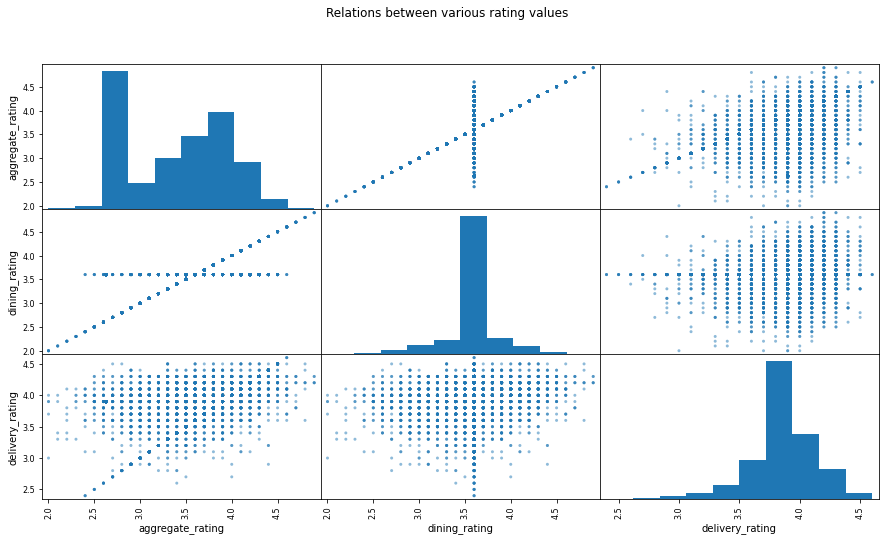

In [26]:
ratings_df = data[['aggregate_rating', 'dining_rating', 'delivery_rating']]
pd.plotting.scatter_matrix(ratings_df, figsize=(15, 8))
plt.suptitle('Relations between various rating values', fontdict={'weight':'bold'})

Text(0.5, 1.0, 'Correlation heatmap')

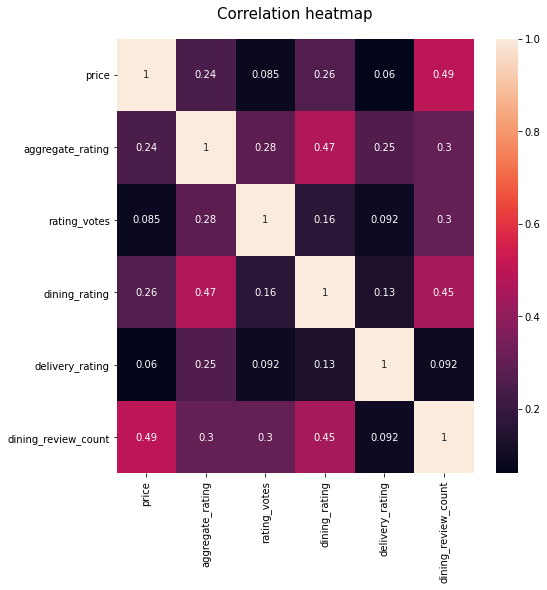

In [28]:
nums = data[['price', 'aggregate_rating', 'rating_votes', 'dining_rating', 'delivery_rating',
            'dining_review_count', 'delivery_review_count']]
corr = nums.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap', size=15, pad=20)

Text(0, 0.5, 'Price')

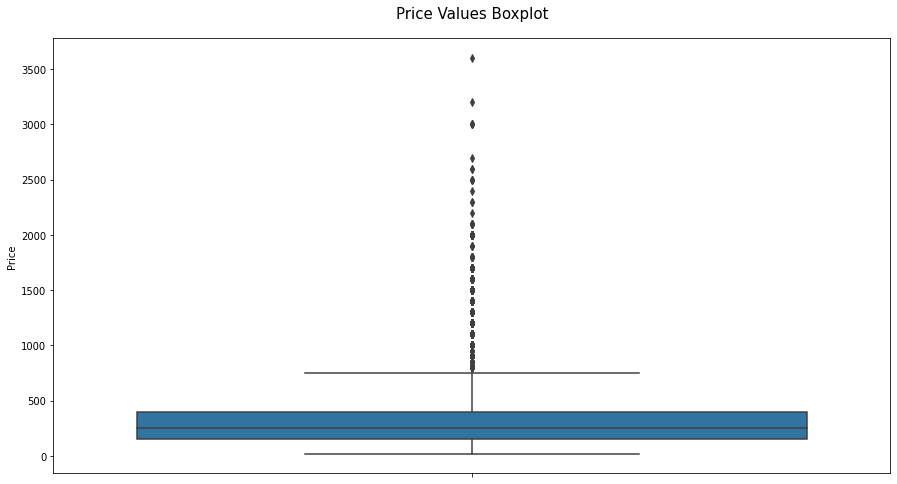

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(y=data.price)
plt.title('Price Values Boxplot', size=15, pad=20)
plt.ylabel('Price')

In [33]:
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Cuisines of Pune')

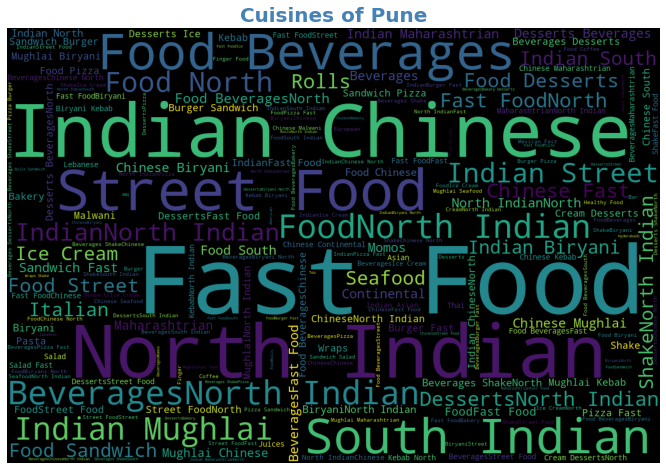

In [34]:
text = ''.join(data.cuisine)
wc = WordCloud(width=1200, height=800, stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(wc)
plt.title('Cuisines of Pune', fontdict={'fontsize':20., 'fontweight':'bold', 'color':'steelblue'})

Text(0.5, 0, 'Number of outlets')

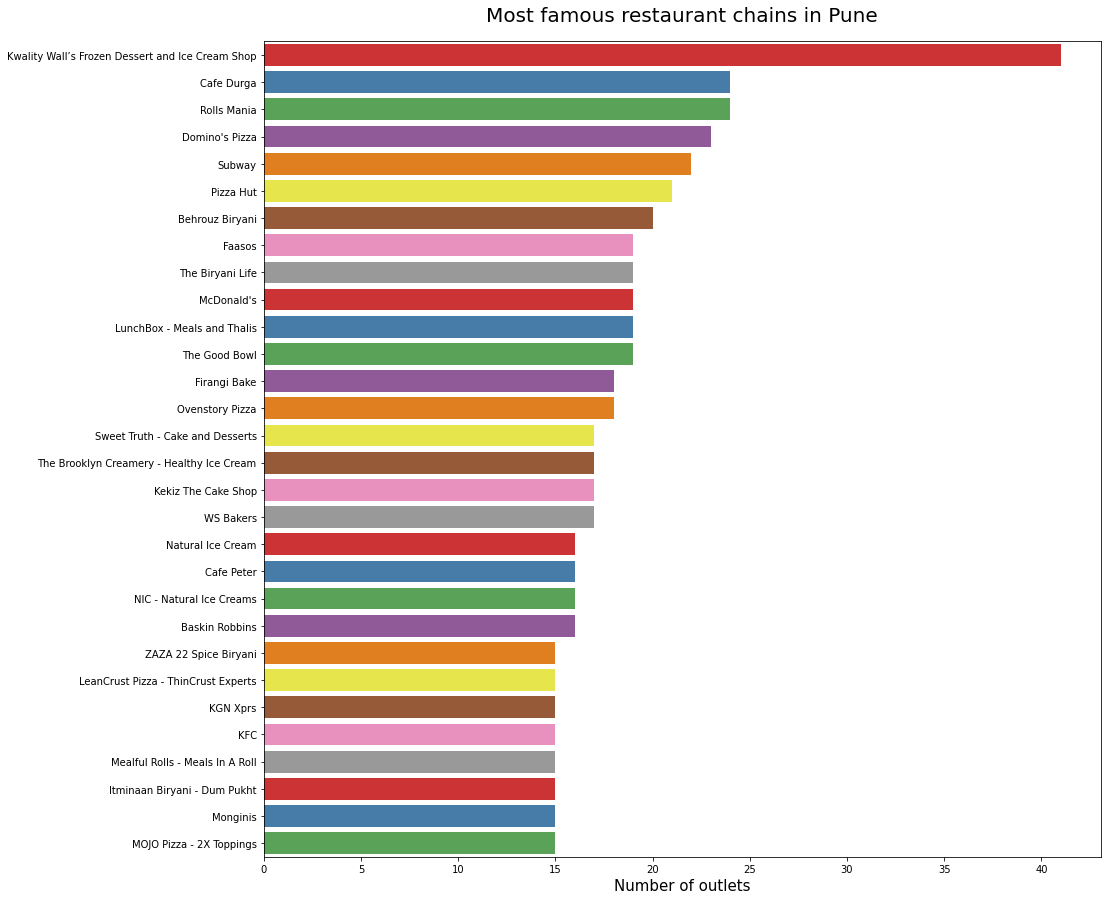

In [35]:
plt.figure(figsize=(15,15))
chains=data['name'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Pune",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage of restaurants')

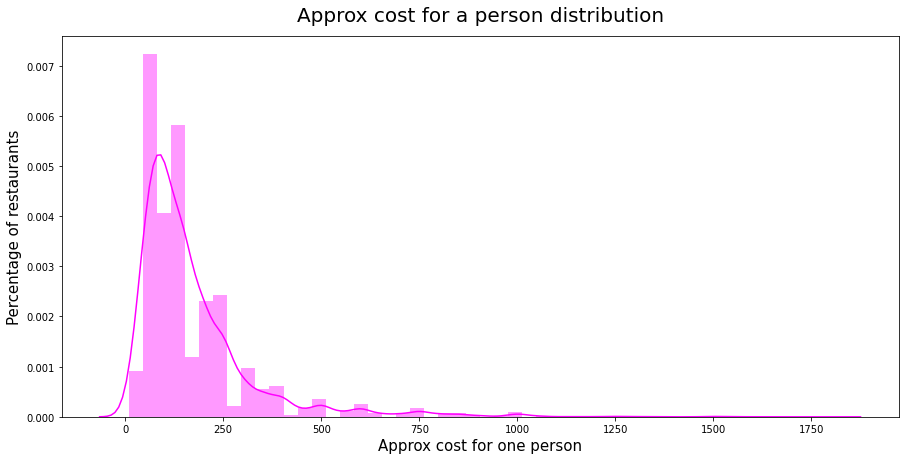

In [36]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(data['price'] / 2,color="magenta")
ax.set_title('Approx cost for a person distribution',size=20,pad=15)
plt.xlabel('Approx cost for one person',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

<AxesSubplot:xlabel='price', ylabel='Proportion'>

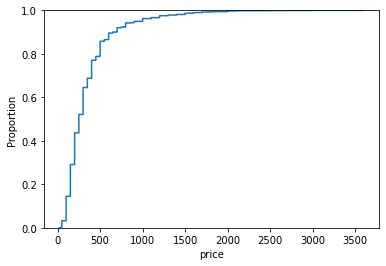

In [37]:
sns.ecdfplot(data=data, x='price')

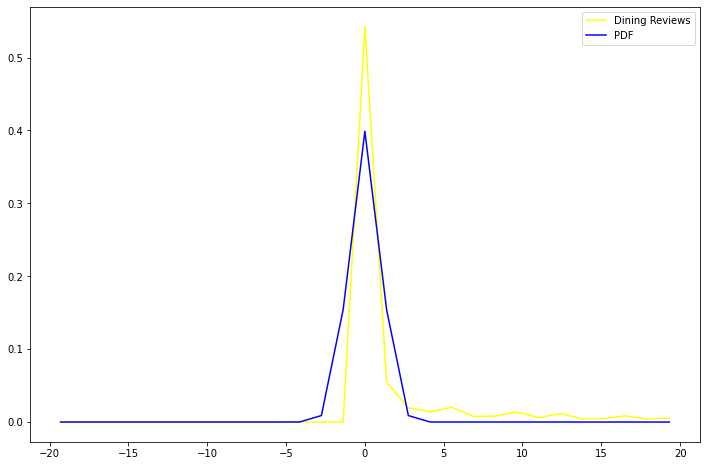

In [43]:
from scipy import stats


samples = data.dining_review_count


bins = np.linspace(-20, 20, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(12, 8))
plt.plot(bin_centers, histogram, label="Dining Reviews", color='yellow')
plt.plot(bin_centers, pdf, label="PDF", color='blue')
plt.legend()
plt.show()

In [41]:
data['delivery_review_count'] = data.delivery_review_count.astype('float')

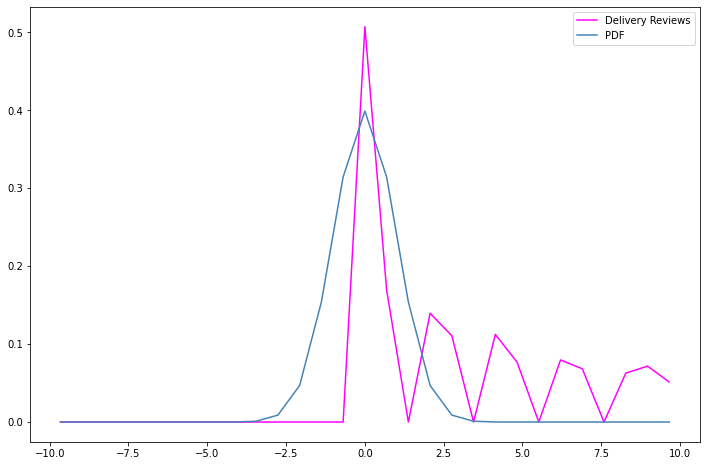

In [46]:
samples = data.delivery_review_count

bins = np.linspace(-10, 10, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(12, 8))
plt.plot(bin_centers, histogram, label="Delivery Reviews", color='magenta')
plt.plot(bin_centers, pdf, label="PDF", color='steelblue')
plt.legend()
plt.show()

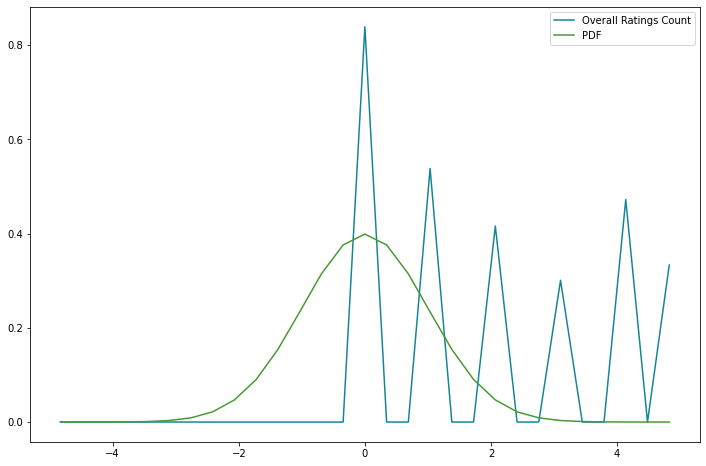

In [48]:
samples = data.rating_votes


bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(12, 8))
plt.plot(bin_centers, histogram, label="Overall Ratings Count", color='#148599')
plt.plot(bin_centers, pdf, label="PDF", color='#489933')
plt.legend()
plt.show()

Text(0.5, 0, 'No. of restaurants')

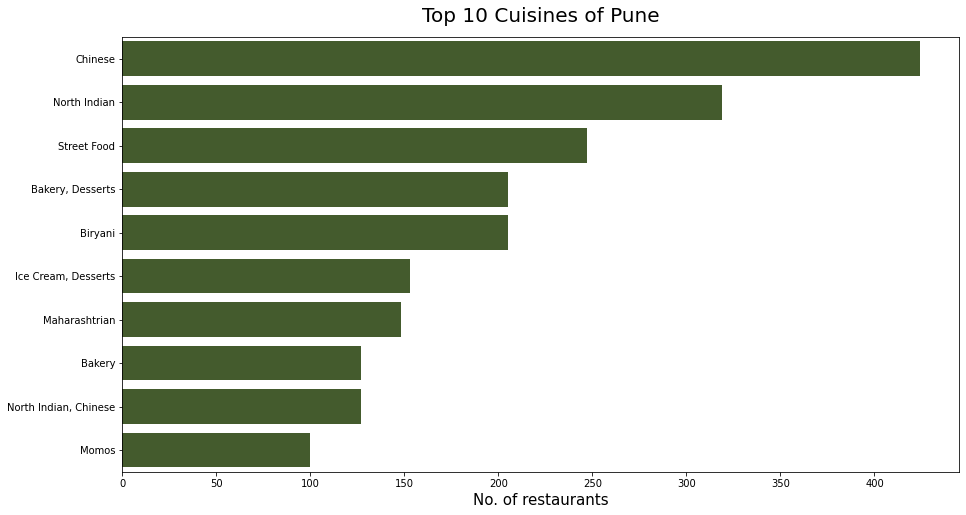

In [51]:
plt.figure(figsize=(15,8))
timings = data['cuisine'].value_counts()[:10]
sns.barplot(x=timings, y=timings.index, color='#446325')
plt.title('Top 10 Cuisines of Pune', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

We can see that Chinese restaurants are predominant in Pune followed by North Indian, Street Food. From this we can say that Punekars prefer these types of food more and as the dataset is scraped from Zomato, food delivery service, these types of foods are ordered more.  

There are restaurants serving only some specific food items like Momos, Biryani indicating their popularity.

Text(0.5, 0, 'No. of restaurants')

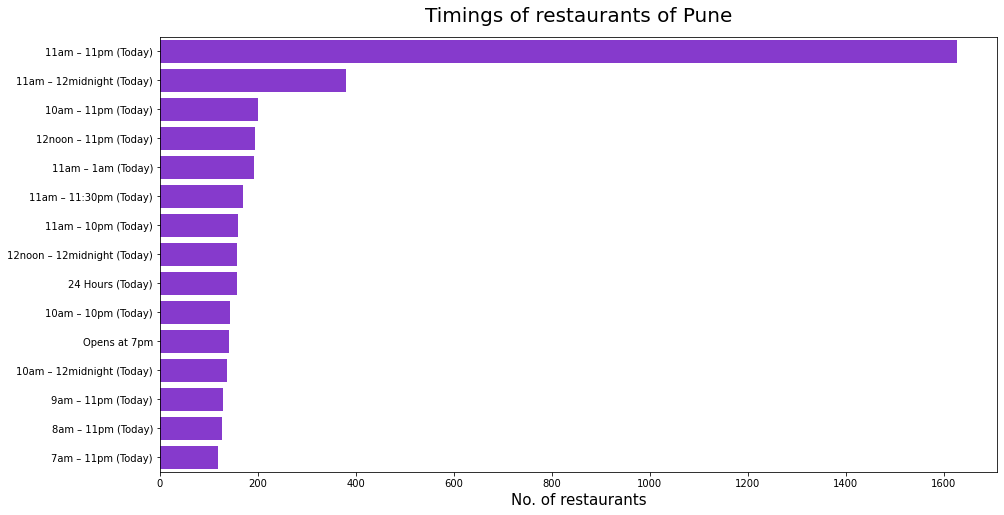

In [49]:
plt.figure(figsize=(15,8))
timings = data['timing'].value_counts()[:15]
sns.barplot(x=timings, y=timings.index, color='#8722e4')
plt.title('Timings of restaurants of Pune', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

From above plot we can interprete that opening time for restaurants varies but the closing time is usually 11 PM or 12 Midnight. And for some restaurants only opening time is provided.

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(data.cuisine)

array([2587,  445,   57, ..., 1417,   57, 2902])

### Map of Restaurant Locations

In [ ]:
import folium

#create a map
this_map = folium.Map(prefer_canvas=True)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
longi = data.location_longitude
latis = data.location_latitude
name = data.name
both = zip(latis, longi, name)

In [70]:
for pair in list(both):
    folium.CircleMarker(location=[pair[0], pair[1]],
                        tooltip=f"<b>{pair[2]}</b>", radius=5).add_to(this_map)

In [71]:
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('simple_dot_plot.html')

this_map

In [56]:
extra = pd.read_csv('new_data.csv')
extra.head()

,Unnamed: 0,name,payment_modes,locality
0,0,Aman's Kitchen,NaN,"Wadgaon Sheri, Pune"
1,1,The Belgian Waffle Co.,Cash and Cards accepted\nDigital payments acce...,"Pimple Saudagar, Pune"
2,2,The Brooklyn Creamery - Healthy Ice Cream,NaN,"Shivane, Pune"
3,3,Kynd Cafe & Bar,Cash and Cards accepted,"Mundhwa, Pune"
4,4,Momo’er,\nDigital payments accepted,"Wadgaon Sheri, Pune"


In [57]:
data2 = extra[['name', 'locality', 'payment_modes']]

In [59]:
new_d = data.set_index('name').join(data2.set_index('name'))

**Top 10 Localities in Pune**

<AxesSubplot:title={'center':'Top restaurant localities'}, xlabel='locality'>

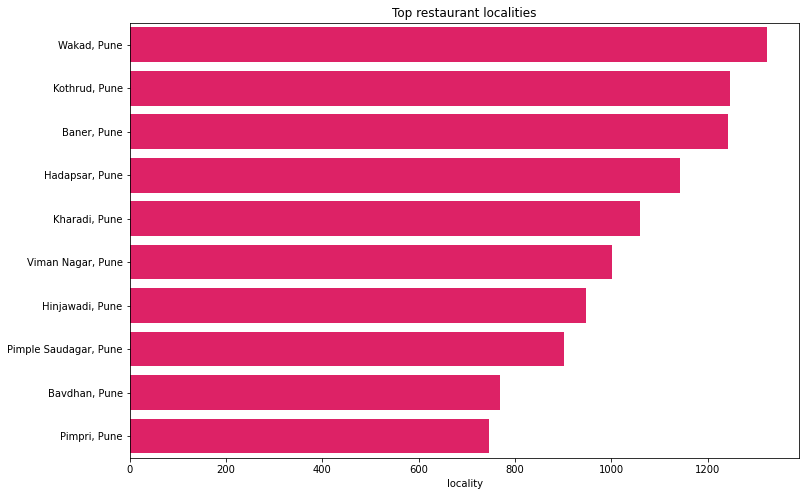

In [66]:
localities = new_d.locality.value_counts()[:10]

plt.figure(figsize=(12, 8))
plt.title('Top restaurant localities')
sns.barplot(y=localities.index, x=localities, color='#fc035e')

Text(0.5, 1.0, 'Payment Modes Accepted')

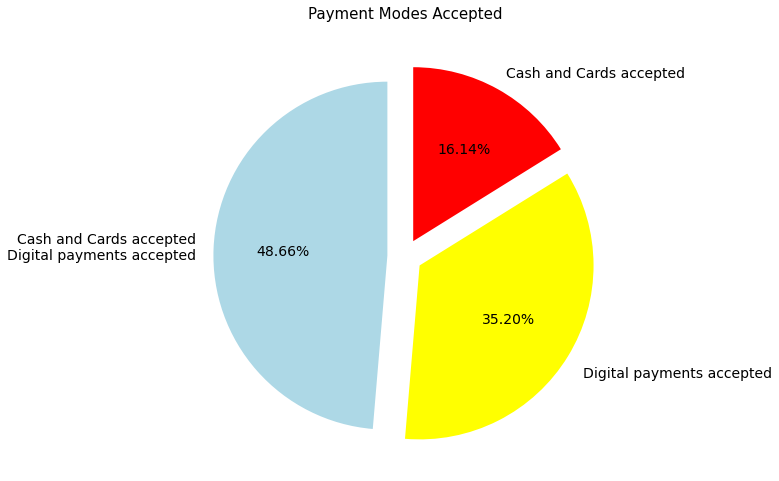

In [68]:
payment_modes = new_d.payment_modes.dropna().value_counts()[:3]

plt.figure(figsize=(12, 8))
labels = payment_modes.index.tolist()
sizes = payment_modes.tolist()
explode = (0.1, 0.1, 0.1)
colors = ['lightblue', 'yellow', 'red']
plt.pie(sizes, labels=labels, autopct='%0.2f%%',startangle=450, textprops={'fontsize': 14}, explode=explode, colors=colors)
plt.title('Payment Modes Accepted', size=15, pad=20)